In [9]:
from tensorflow import keras
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from chart import chart

### Target 만들기

In [10]:
target_list=['acoustic','electric','saxophone']

In [11]:
target=np.concatenate([np.zeros(48000),np.ones(48000),np.full(48000,2)])

In [12]:
target.shape

(144000,)

In [13]:
np.unique(target,return_counts=True)

(array([0., 1., 2.]), array([48000, 48000, 48000], dtype=int64))

### Data 만들기

In [14]:
data=[]

In [15]:
for f in target_list:
    for i in glob.glob(f'../Data/converted/{f}/*.jpg'):
        img=Image.open(i)
        imgArray=np.array(img)
        data.append(imgArray)

dataArr=np.array(data)
dataArr.shape

(144000, 100, 100)

In [16]:
data_scaled=dataArr.reshape(-1,100,100,1)
data_scaled.shape

(144000, 100, 100, 1)

In [17]:
np.save('inst_data_final.npy',data_scaled)

In [58]:
acoustics=glob.glob('../Data/acoustic/*.jpg')

for acoustic in acoustics:
    img=Image.open(acoustic)
    imgArray=np.array(img)
    data.append(imgArray)

In [59]:
electrics=glob.glob('../Data/electric_guitar/*.jpg')

for electric in electrics:
    img=Image.open(electric)
    imgArray=np.array(img)
    data.append(imgArray)

In [60]:
saxophones=glob.glob('../Data/saxophone/*.jpg')

for saxophone in saxophones:
    img=Image.open(saxophone)
    imgArray=np.array(img)
    data.append(imgArray)

In [61]:
data=np.array(data)
data.shape

(381696, 100, 100)

In [62]:
data_scaled=data.reshape(-1,100,100,1)
data_scaled.shape

(381696, 100, 100, 1)

In [63]:
np.save('inst_data3.npy',data_scaled)

In [15]:
train_input,test_input,train_target,test_target=train_test_split(data_scaled,target,test_size=0.2)
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2)

In [16]:
print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

(244284, 100, 100, 1)
(61072, 100, 100, 1)
(76340, 100, 100, 1)


In [21]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(100,100,1))) #Convolution
model.add(keras.layers.MaxPooling2D(2)) #Pooling
# model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3,activation='softmax'))

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('../Data/best_cnn_model.h5')
earlystopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(train_input,train_target,epochs=1000,validation_data=(val_input,val_target),callbacks=[checkpoint_cb,earlystopping_cb])

Epoch 1/1000
2195/7634 [=======>......................] - ETA: 5:57 - loss: 0.4581 - accuracy: 0.9973

KeyboardInterrupt: 

In [51]:
testimg=Image.open('../Data/guitar/guitar0001.jpg')
testimg=testimg.resize((100,100))
testimg=testimg.convert('L')
testarr=np.array(testimg).reshape(100,100,1)

In [52]:
testarr.shape

(100, 100, 1)

In [53]:
lmodel=keras.models.load_model('../Data/cnn_model.h5',compile=False)
lmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
np.argmax(lmodel.predict(testarr))

ValueError: in user code:

    File "c:\Users\dbtmd\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\dbtmd\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\dbtmd\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\dbtmd\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\dbtmd\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d" "                 f"(type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node sequential/max_pooling2d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential/conv2d/Relu)' with input shapes: [?,100,1,32].
    
    Call arguments received by layer "max_pooling2d" "                 f"(type MaxPooling2D):
      • inputs=tf.Tensor(shape=(None, 100, 1, 32), dtype=float32)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

gen=keras.models.load_model('../Data/generator.h5')
test_noise = tf.random.normal([1, 100])
plt.figure(figsize=(10,10))
images = gen.predict(test_noise)
images = 0.5 * images + 0.5
image = images[0].reshape(100, 100,3)
plt.imshow(image)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 234ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


: 

: 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image

gen=keras.models.load_model('../Data/generator.h5')
test_noise = tf.random.normal([1, 100])
images = gen.predict(test_noise)
images = 0.5 * images + 0.5
image = images[0].reshape(100, 100,3)

img=Image.fromarray(((image)*127.5+127.5).astype('uint8').reshape(100,100,3))
img.save(f'./1.jpg', 'JPEG')

1/1 [==============================] - 0s 147ms/step


In [8]:
import glob
import tensorflow as tf
from tensorflow import keras
from PIL import Image

genlist=['acoustic','acoustic','electric','electric','saxophone','saxophone']

i=0
fileCount=0
for g in sorted(glob.glob('../Data/generator/*.h5')):
    gen=keras.models.load_model(g)
    test_noise = tf.random.normal([1000, 100])
    images = gen.predict(test_noise)
    images = 0.5 * images + 0.5
    for img in images:
        image = img.reshape(100, 100,3)
        savedimg=Image.fromarray(((img)*127.5+127.5).astype('uint8').reshape(100,100,3))
        savedimg.save(f'../Data/saved/{genlist[i]}/{genlist[i]}_{fileCount}.jpg', 'JPEG')
        fileCount+=1
    i+=1

32/32 [==============================] - 16s 482ms/step


In [1]:
def relu(x):
    if x<0:
        return 0
    else:
        return x

In [15]:
import numpy as np


def Conv(org,fil):
    pad=np.zeros((org.shape[0]+fil.shape[0]-1)*(org.shape[1]+fil.shape[1]-1)).reshape(org.shape[0]+fil.shape[0]-1,org.shape[1]+fil.shape[1]-1)

    for i in range(org.shape[0]):
        for j in range(org.shape[1]):
            pad[np.array(((fil.shape[0]-1)/2)+i).astype(int)][np.array(((fil.shape[1]-1)/2)+j).astype(int)]=org[i][j]

    resArray=np.zeros((org.shape[0])*(org.shape[1])).reshape(org.shape[0],org.shape[1])
    for k in range(org.shape[0]):
        for l in range(org.shape[1]):
            res=0
            for y_in in range(fil.shape[0]):
                for x_in in range(fil.shape[1]):
                    res+=pad[k+y_in][l+x_in]*fil[y_in][x_in]
                    resArray[k][l]=relu(res)
    return resArray

ValueError: setting an array element with a sequence.

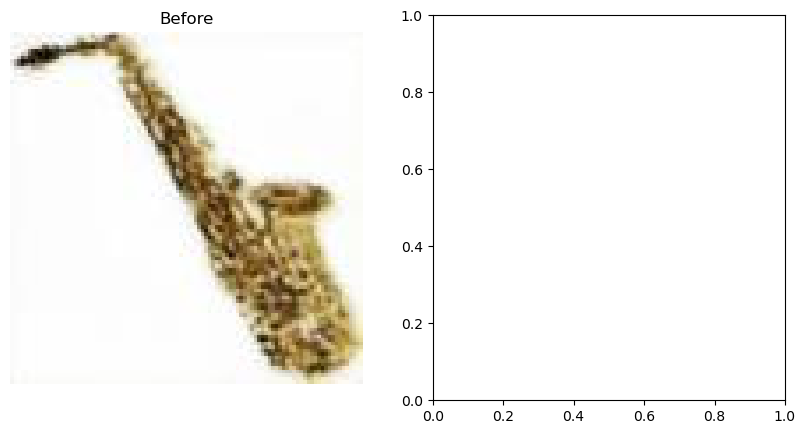

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img=Image.open('../Data/sexophonefinal/00001.jpg')
imgArr=np.array(img)

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.imshow(imgArr,cmap='gray_r')
ax1.set_title('Before')
ax1.set_axis_off()
ax2.imshow(Conv(imgArr,np.array([[35,15,40.7],[0,59,0],[0,-55,-85]])),cmap='gray_r')
ax2.set_title('After')
ax2.set_axis_off()
plt.show()

In [8]:
from tensorflow import keras
from PIL import Image
import numpy as np

model=keras.models.load_model('./cnn_inst_model.h5')
img=Image.open('.1.jpg')
imgConverted=img.resize((100,100)).convert('L')
imgArray=np.array(imgConverted)
model.predict(imgConverted)

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_load_context_function'